In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

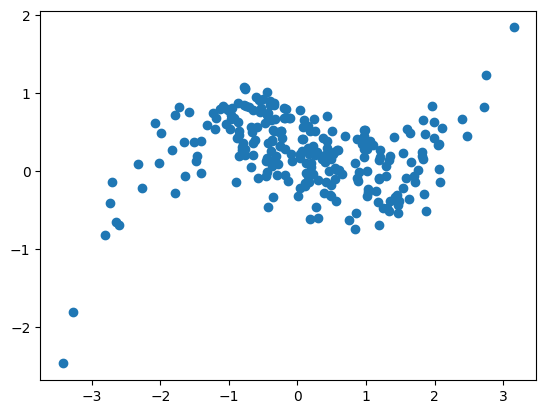

In [57]:
rng = np.random.default_rng(seed = 123)
n = 250
effect = 0.5
t_proportion = 0.5
x = rng.normal(scale = 1.2, size = (n,))
t = rng.binomial(n=1, p=t_proportion, size=(n,))
xt = 10*(x**2/20-0.2)*(x/5)
y = effect*t + xt + rng.normal(scale = 0.2, size=(n,))
plt.scatter(x, y)

In [59]:
data = pd.DataFrame(
    {"x" : x,
    "t": t,
    "y" : y}
)
reg = smf.ols(
    "y ~ t + x + t:x",
    data = data
).fit()
reg.get_robustcov_results('HC2').summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.268
No. Observations:                 250   F-statistic:                     45.39
Covariance Type:                  HC2   Prob (F-statistic):           1.63e-17
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0283      0.042     -0.672      0.503      -0.111       0.055
t              0.5001      0.053      9.484      0.000       0.396       0.604
x             -0.0045      0.046     -0.100      0.921      -0.094       0.085
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""